# Keras image classification using Lenet model

In [0]:
import numpy as np 
import pandas as pd 

from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

__Mount dog and cat images on my goolge drive__

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import os
print(os.listdir("/content/drive/My Drive/DogsvsCats"))

['train', 'test']


__Attache labels to dog and cat catogories__

In [34]:
filenames = os.listdir("/content/drive/My Drive/DogsvsCats/train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
df.head()

,filename,category
0,dog.10833.jpg,1
1,dog.10827.jpg,1
2,cat.6189.jpg,0
3,dog.2861.jpg,1
4,cat.5494.jpg,0


__Random check image data sample__

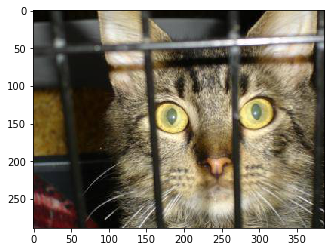

In [35]:
sample = random.choice(filenames)
image = load_img("/content/drive/My Drive/DogsvsCats/train/"+sample)
plt.imshow(image)

# Build Lenet MODEL

In [0]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D,AveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras import backend as K
from keras import optimizers

In [37]:
input_shape = (224, 224, 3)
model = Sequential([
Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
Conv2D(128, (3, 3), activation='relu', padding='same'),    
AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
Flatten(),
Dense(512,activation='relu'),
Dense(512,activation='relu'),
Dense(1, activation='sigmoid')    
])

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
average_pooling2d_5 (Average (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
average_pooling2d_6 (Average (None, 56, 56, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 401408)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               205521408 
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

In [0]:
train_df, validate_df = train_test_split(df, test_size=0.1)
train_df = train_df.reset_index()
validate_df = validate_df.reset_index()

# validate_df = validate_df.sample(n=100).reset_index() # use for fast testing code purpose
# train_df = train_df.sample(n=1800).reset_index() # use for fast testing code purpose

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [39]:
image_size = 224
epochs = 5
batch_size = 16
train_df['category']= train_df['category'].astype('str')
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "/content/drive/My Drive/DogsvsCats/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 22503 validated image filenames belonging to 2 classes.


In [40]:
validate_df['category']= validate_df['category'].astype('str')
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "/content/drive/My Drive/DogsvsCats/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2501 validated image filenames belonging to 2 classes.


Found 22503 validated image filenames belonging to 2 classes.


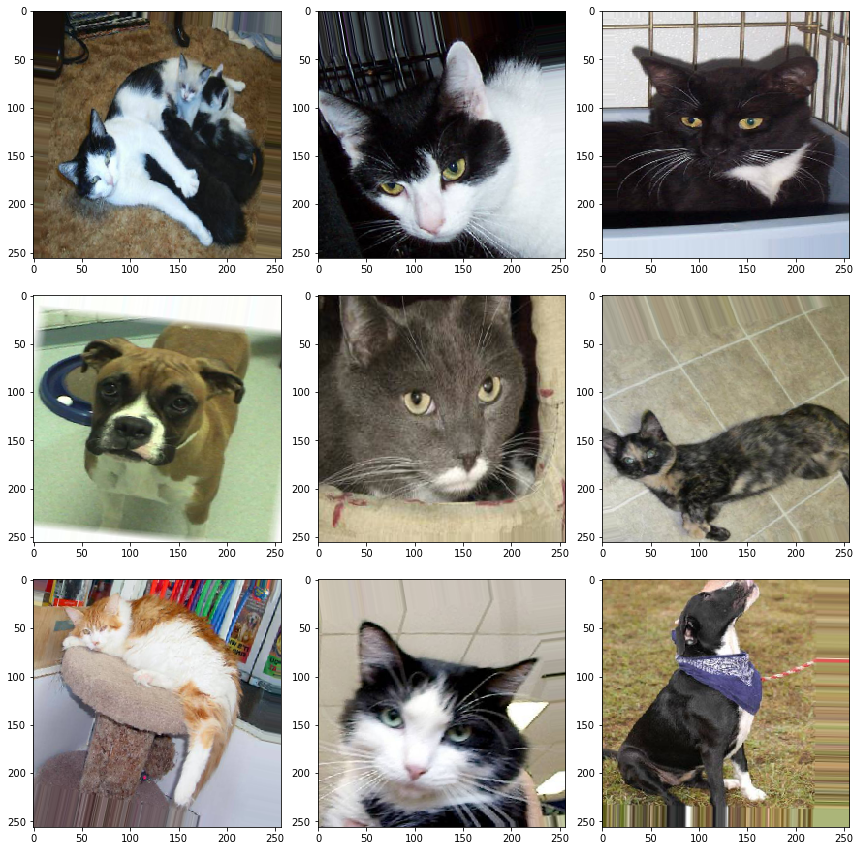

In [41]:
example_df = train_df
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "/content/drive/My Drive/DogsvsCats/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary'
)
plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

__Train the Lenet model__

In [42]:
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

Epoch 1/5
1406/1406 [==============================] - 514s 366ms/step - loss: 0.6813 - acc: 0.5618 - val_loss: 0.6703 - val_acc: 0.5853
Epoch 2/5
1406/1406 [==============================] - 513s 365ms/step - loss: 0.6655 - acc: 0.5977 - val_loss: 0.6577 - val_acc: 0.6052
Epoch 3/5
1406/1406 [==============================] - 512s 364ms/step - loss: 0.6569 - acc: 0.6065 - val_loss: 0.6609 - val_acc: 0.5988
Epoch 4/5
1406/1406 [==============================] - 513s 365ms/step - loss: 0.6499 - acc: 0.6165 - val_loss: 0.6396 - val_acc: 0.6237
Epoch 5/5
1406/1406 [==============================] - 518s 368ms/step - loss: 0.6429 - acc: 0.6249 - val_loss: 0.6383 - val_acc: 0.6310


In [43]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.633013  ;  loss = 0.635804 


__Plot model accuracy__

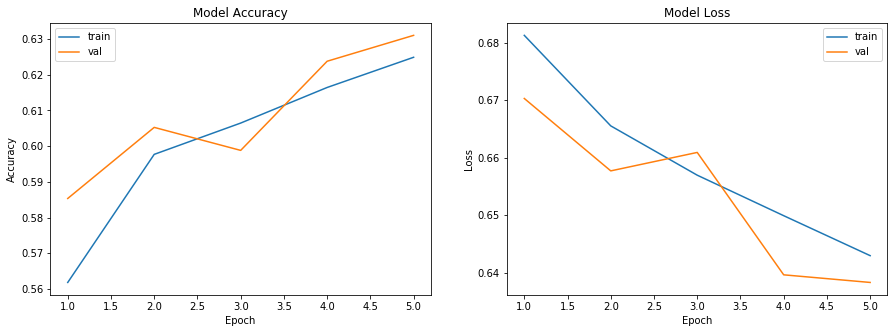

In [44]:
def plot_model_history(model_history, acc='acc', val_acc='val_acc'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(history)